ОПИСАНИЕ ПРОЕКТА

Я выступаю в качестве аналитика крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.


Цель: Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

In [1]:
#Импортируем все библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st

### Часть  (Приоритизация гипотез)

In [2]:
#Ознакомимся с данными
pd.set_option('display.max_columns', None)
hyp = pd.read_csv('/datasets/hypothesis.csv')
hyp.columns = hyp.columns.str.lower() 
hyp

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<font color='DarkBlue'>Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.</font><br>

In [3]:
hyp['ICE'] = (hyp['impact']*hyp['confidence'])/ hyp['efforts']
hyp[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


<font color='DarkBlue'>Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.</font><br>

In [4]:
hyp['RICE'] = (hyp['reach']*hyp['impact']*hyp['confidence'])/ hyp['efforts']
hyp[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


<font color='DarkBlue'>Укажим, как изменилась приоритизация гипотез при применении RICE вместо ICE</font><br>

Гипотезы под номерами 1,3,4,5 находятся в конце обеих таблиц, так что их не имеет смысла рассматривать. Самые первые к выполнению проверки, по моему мнению, должны быть гипотезы 0 и 7. Они находятся на высоких позициях в таблице, имеют большое влияние, а 7 охватывает еще и огромную аудиторию.

Вывод: я рекомендую в первую очередь проверить гипотезы 0,7

### Часть (Анализ A/B-теста)

План анализа A/B-тест:
1. Построить график кумулятивной выручки по группам. 
2. Построить график кумулятивного среднего чека по группам.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
4. Построить график кумулятивного среднего количества заказов на посетителя по группам.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
6. Построить точечный график количества заказов по пользователям. 
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя.
8. Построить точечный график стоимостей заказов.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. 
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.


Принять решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

In [5]:
#Ознакомимся с данными
pd.set_option('display.max_columns', None)
orders = pd.read_csv('/datasets/orders.csv')
orders.columns = orders.columns.str.lower() 
orders.head(5)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
sum_ord = orders['transactionid'].count()
print('всего в таблице', sum_ord, 'строк')

всего в таблице 1197 строк


In [7]:
#Ознакомимся с данными
pd.set_option('display.max_columns', None)
visitors = pd.read_csv('/datasets/visitors.csv')
visitors .columns = visitors .columns.str.lower() 
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
#дополнительные исследования
print('количество групп:', orders['group'].nunique())


количество групп: 2


In [9]:
print('количество пользователей в группе А')
print(orders[orders['group'] == 'A']['visitorid'].nunique ())

print('количество пользователей в группе В')
print(orders[orders['group'] == 'B']['visitorid'].nunique ())

количество пользователей в группе А
503
количество пользователей в группе В
586


In [10]:
min_date = orders['date'].min()
max_date = orders['date'].max()

print(f'исследования проводились с {min_date} по {max_date}')

исследования проводились с 2019-08-01 по 2019-08-31


In [11]:
tabl = [orders, visitors]

orders.name = 'orders'
visitors.name = 'visitors'

# проверим, что нет пропусков 
sum_isna = 0
for tab in tabl:
    for column in tab:
        val_col = tab[column]
        sum_isna += val_col.isna().sum()
if sum_isna == 0:
    print('пропусков в таблицах нет')
else:
    print('пропуски в таблицах есть') 
    
#проверка на явные дубликаты
for tab in tabl:
    print(f'В таблице {tab.name} количество дубликатов = {tab.duplicated().sum()}')

пропусков в таблицах нет
В таблице orders количество дубликатов = 0
В таблице visitors количество дубликатов = 0


In [12]:
ordB = orders[orders['group'] == 'B']['visitorid'].unique()
ordA = orders[orders['group'] == 'A']['visitorid'].unique()
err = []

for x in orders['visitorid']:
    if (x in ordB and x in ordA):
        err.append(x)

print(f'количество пользоватедей, которые вошли в обе группы: {len(err)} ')

количество пользоватедей, которые вошли в обе группы: 181 


так как позьзователи на пересечении могут повлиять на исход тестов, то их нужно удалить

In [13]:
for x in orders['visitorid']:
    if (x in err):
        orders = orders[orders['visitorid']!=x]

In [14]:
#проверим, что теперь не осталось пользователей на пересечении
ordB = orders[orders['group'] == 'B']['visitorid'].unique()
ordA = orders[orders['group'] == 'A']['visitorid'].unique()
err = []

for x in orders['visitorid']:
    if (x in ordB and x in ordA):
        err.append(x)

print(f'количество пользоватедей, которые вошли в обе группы: {len(err)} ')

количество пользоватедей, которые вошли в обе группы: 0 


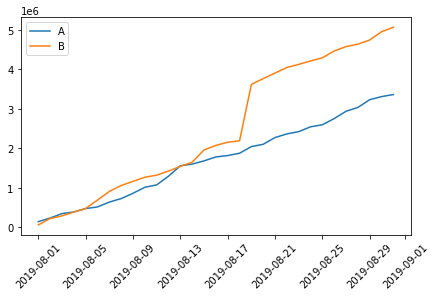

In [15]:
#Построим график кумулятивной выручки по группам

orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(7, 4))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation = 45)

plt.legend() 


Сегмент В, начиная с середины времени, явно лидирует. Но подозрительным кажется, что есть резкий скачек, скорее всего аномально большой заказ слишком сильно повлиял на результат и нужно будет далее поработать с аномалиями.

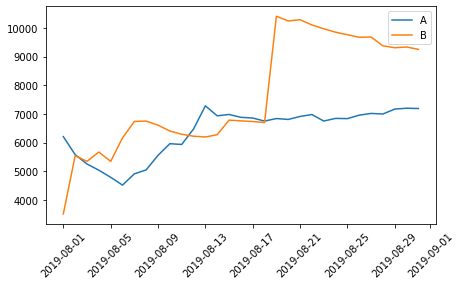

In [16]:
#Построим график кумулятивного среднего чека по группам.

plt.figure(figsize=(7, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.legend() 

В середине произошел резкий скачек в группе В (видимо действительно присутствует аномально дорогой заказ), но потои средний чек сегмента В убывает, а сегмента А - медленно возрастает. Нужен анализ выбросов. 

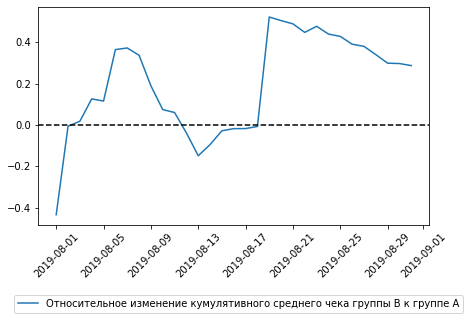

In [17]:
#Построим график относительного изменения кумулятивного среднего чека группы B к группе A

mergedCumulativeRevenue = cumulativeRevenueA[['date','revenue', 'orders']].merge(cumulativeRevenueB[['date','revenue', 'orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(7, 4))
plt.plot(mergedCumulativeRevenue['date'], ((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']))-1, label="Относительное изменение кумулятивного среднего чека группы B к группе A")
plt.legend(bbox_to_anchor=(1.1 , -0.3))
plt.xticks(rotation = 45)
plt.axhline(y=0, color='black', linestyle='--')


В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её средний чек  снова падал, после - резко увеличился, потом постепенно стал убывать.
В целом отношение ещё не установилось, но данные сегмента В скорее падают. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину, так как резкий рост в середине - это скорее всего аномально дорогой заказ в группе B.

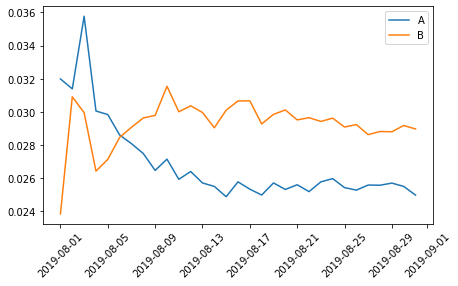

In [18]:
#Построим график кумулятивного среднего количества заказов на посетителя по группам

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(7, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xticks(rotation = 45)
plt.legend() 

Покупатели группы В после колебаний в начале покупают больше, количество заказов больше, но резкий счкачек смущает.

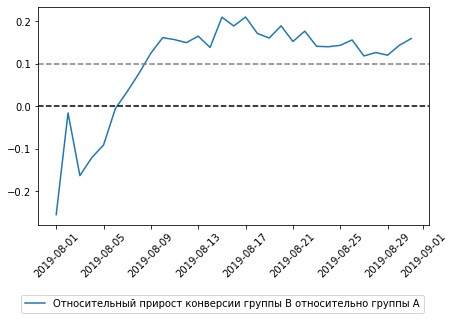

In [19]:
#Постройте график относительного изменения кумулятивного среднего количества заказов 
#на посетителя группы B к группе A.

plt.figure(figsize=(7, 4))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.xticks(rotation = 45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.legend(bbox_to_anchor=(1 , -0.3))

График окончательно не устаканился, но пользователи сегмента В в среднем заказывают действительно больше, но все тот же резкий скачек не вызывает доверия

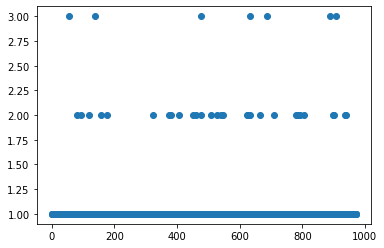

In [20]:
#Построим точечный график количества заказов по пользователям.

ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['userid', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

Большенство пользователей делает не более 3-4 заказов.

In [21]:
#Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


То есть всего 5% пользователей совершают более 2 заказов, и всего 1% - более 4.
В качестве границы аномальных значений предлагаю выбрать 3 заказа (тогда мы отсечем примерно 2-3% пользователей).

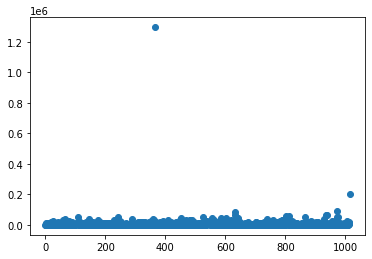

In [22]:
#Построим точечный график стоимостей заказов.

x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'])

Видим, что есть аномально большие значения, что подтверждает предположения выше.

In [23]:
#Посчитайте 95-й и 99-й перцентили стоимости заказов.


print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Только 5% пользователей покупают на сумму больше 28000, и только 1% - выше 58233. 
В качестве границы аномалий считаю нужным взять значение 28000

<font color='DarkBlue'>
Сформулируем гипотезы. 
    
    Нулевая: различий в среднем количестве заказов между группами нет. 
    Альтернативная: различия в среднем количестве заказов между группами есть.
</font><br>

In [24]:
#Посчитаем статистическую значимость различий в среднем количестве заказов 
#на посетителя между группами по «сырым» данным. 

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print(' ')

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              23           142779              17   
1  2019-08-02              19            91602              23   
2  2019-08-03              24           112473              14   
3  2019-08-04              11            41176              14   
4  2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54           

P-value меньше 0.05, значит есть смысл задуматься над отвержением нулевой гипотезы и считать, что в в среднем количестве заказов есть различия. Среднее количество заказов группы B значительно выше среднего количества заказов (на 13.8%) группы A на посетителя, но нужно не забывать о том, что на аданном этапе данные "сырые", с аномальными значениями

<font color='DarkBlue'>
Сформулируем гипотезы. 
    
    Нулевая: различий в среднем чеке между группами нет. 
    Альтернативная: различия в среднем чеке между группами есть.
</font><br>

In [25]:
#Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, средний чек группы B значительно выше среднего чека группы A (на 25.9%). Скорее всего, как мы и предполагали раньше, в группе В есть аномально дорогой заказ.

In [26]:
# Очистим данные
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Количество аномальных пользователей', abnormalUsers.shape[0]) 
print('Количество пользоватлелей с аномальными показателями примерно равно', round((abnormalUsers.shape[0] / sum_ord) * 100),'%')

1099    148427295
928     204675465
684     358944393
648     382846391
751     689129267
Name: visitorid, dtype: int64
Количество аномальных пользователей 48
Количество пользоватлелей с аномальными показателями примерно равно 4 %


Процент аномальных пользователей не велик, поэтому можно проводить дальнейший анализ без них.

<font color='DarkBlue'>
Сформулируем гипотезы. 
    
    Нулевая: различий в среднем количестве заказов между группами нет по "очищенным данным". 
    Альтернативная: различия в количестве заказов между группами есть по "очищенным данным".
</font><br>

In [27]:
#Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя 
#между группами по «очищенным» данным.

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.162


После "очистки данных" результаты среднего количества заказов на посетителя существенно не изменились. А значит, p-value все еще мал (меньше 0.05), и можно считать вероятность ошибочно отвергнуть нулевую гипотезу также мала.

<font color='DarkBlue'>
Сформулируем гипотезы. 
    
    Нулевая: различий в среднем чеке между группами нет по «очищенным» данным. 
    Альтернативная: различия в среднем чеке между группами по «очищенным» данным есть.
</font><br>

In [28]:
# Посчитаем статистическую значимость различий в среднем чеке заказа 
# между группами по «очищенным» данным.

print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.862
-0.028


P-value увеличился и разница между сегментами сократилась и стала отрицательной. То есть вероятность того, что отвержение нулевой гипотезы будет неверным очень велика.